In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
# Load the CSV dataset
df = pd.read_csv("WELFake_Dataset.csv")

# Drop missing values from 'text' and 'label'
df = df.dropna(subset=["text", "label"])

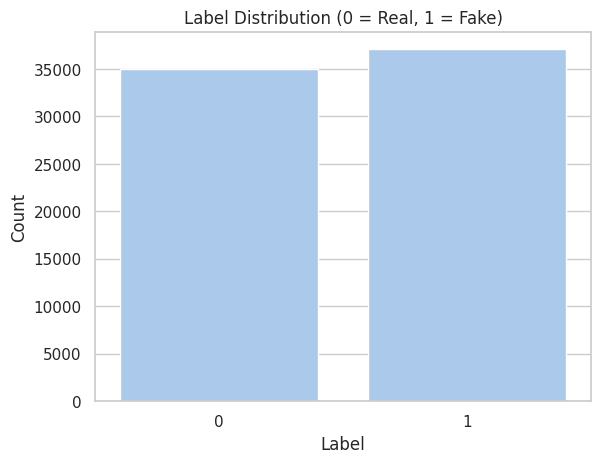

In [6]:
# Visualize label distribution
sns.countplot(data=df, x="label")
plt.title("Label Distribution (0 = Real, 1 = Fake)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [7]:
# Split features and labels
X = df["text"]
y = df["label"]

In [8]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_vect = vectorizer.fit_transform(X)

In [9]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

In [10]:
# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [11]:
# Predict on test set
nb_preds = nb_model.predict(X_test)



In [12]:
# Print evaluation metrics
print("📊 Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("🔍 Naive Bayes Classification Report:\n", classification_report(y_test, nb_preds))

📊 Naive Bayes Accuracy: 0.8373673625078022
🔍 Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      7010
           1       0.83      0.86      0.84      7409

    accuracy                           0.84     14419
   macro avg       0.84      0.84      0.84     14419
weighted avg       0.84      0.84      0.84     14419



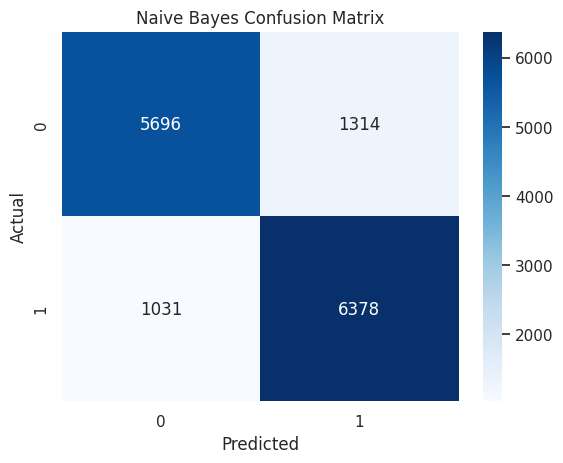

In [13]:
# Display confusion matrix
nb_cm = confusion_matrix(y_test, nb_preds)
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()